In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/ToyotaCorolla - MLR.csv'
df = pd.read_csv(file_path)

print(df.head())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  


In [2]:
# Display summary statistics
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [3]:
# Check for missing values
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [4]:
# Display the datatypes of the columns
print(df.dtypes)

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object


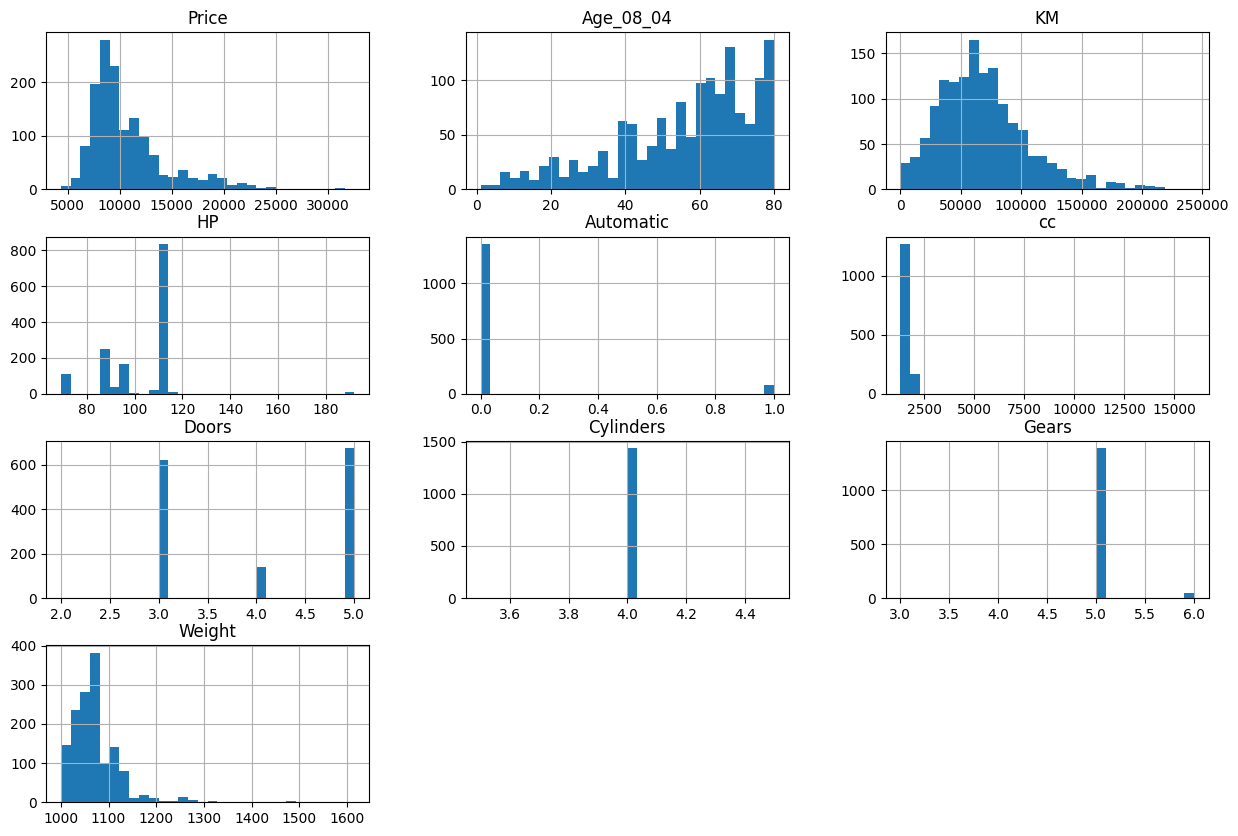

In [5]:
# Visualize the distribution of the numerical variables
df.hist(bins=30, figsize=(15, 10))
plt.show()



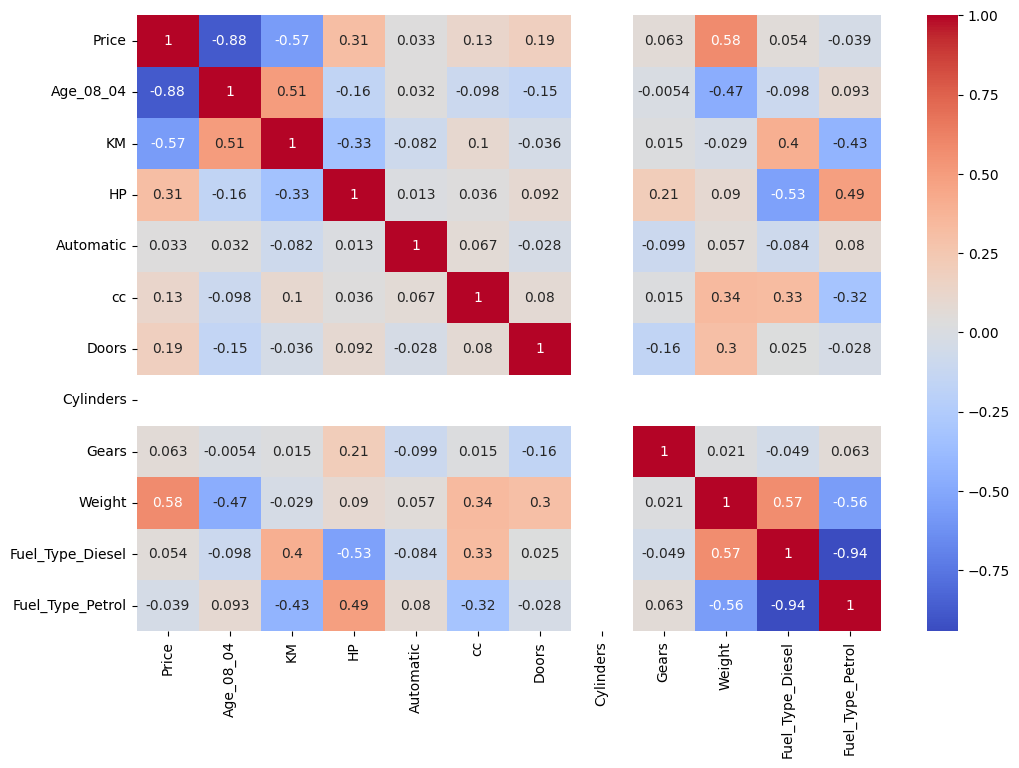

In [7]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Visualize the correlation matrix after encoding categorical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

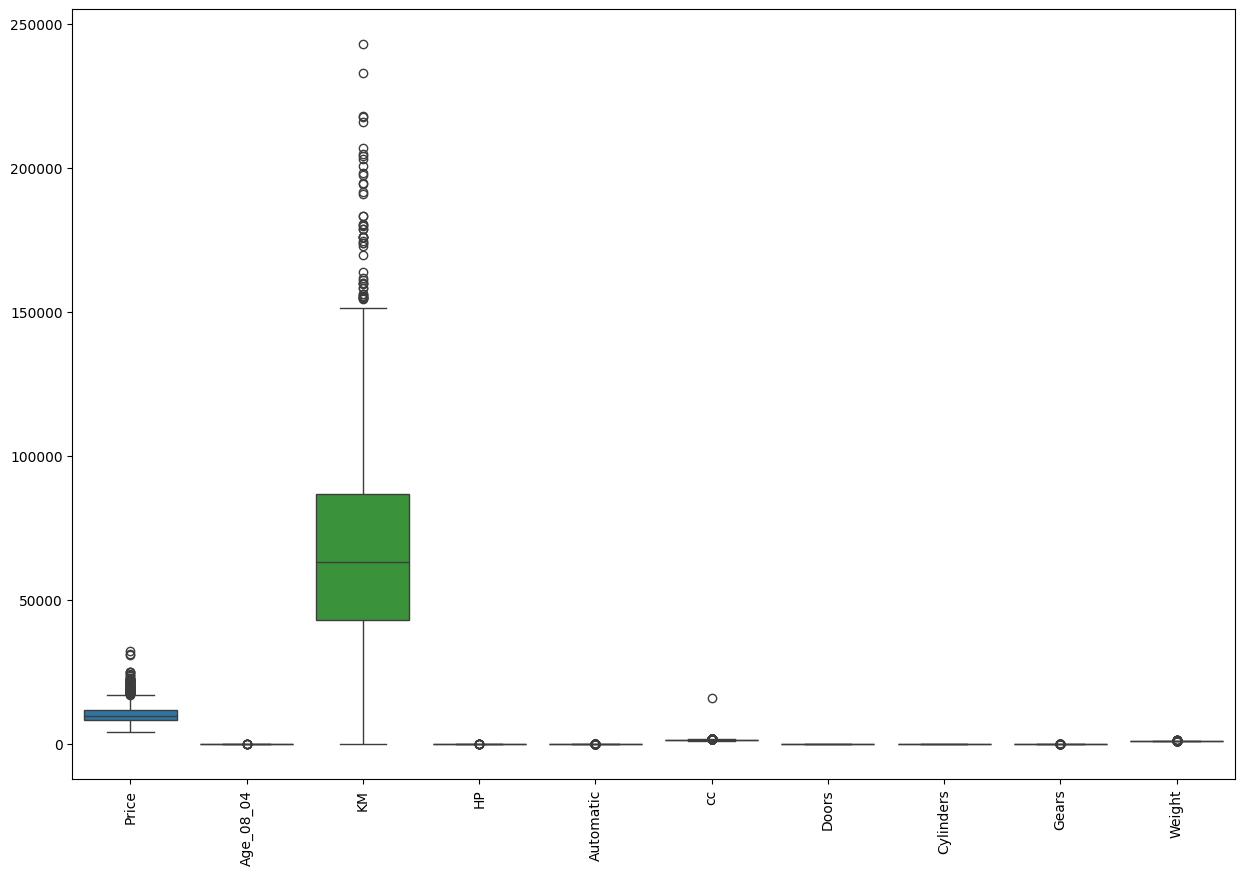

In [8]:
# Boxplot to visualize outliers in numerical variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = df.drop(columns=['Price'])
y = df['Price']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 1148
Testing set size: 288


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# One-hot encode categorical variables (excluding the target variable)
df_encoded = pd.get_dummies(df, drop_first=True)

# Define the features (X) and target (y)
X = df_encoded.drop(columns=['Price'])  # Drop the target variable 'Price'
y = df_encoded['Price']  # The target variable is 'Price'

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now fit the model
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Print the coefficients of the model
print(f"Model 1 coefficients: {model1.coef_}")


Model 1 coefficients: [-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01 -1.62003744e-12  5.51600710e+02
  2.58849583e+01 -6.85487568e+01  1.37080891e+03]


In [14]:
# Model 2: Using selected features (example: Age, KM, HP, Weight)
selected_features = ['Age_08_04', 'KM', 'HP', 'Weight']
model2 = LinearRegression()
model2.fit(X_train[selected_features], y_train)  # Fit the model with selected features
y_pred2 = model2.predict(X_test[selected_features])  # Generate predictions for the test set

# Evaluate Model 1
mse1, rmse1, r21 = evaluate_model(y_test, y_pred1)
print(f"Model 1 - MSE: {mse1}, RMSE: {rmse1}, R-squared: {r21}")

# Evaluate Model 2
mse2, rmse2, r22 = evaluate_model(y_test, y_pred2)
print(f"Model 2 - MSE: {mse2}, RMSE: {rmse2}, R-squared: {r22}")

# Model 3: Adding interaction terms (example: Age * KM, HP * Weight)
X_train['Age_KM'] = X_train['Age_08_04'] * X_train['KM']
X_test['Age_KM'] = X_test['Age_08_04'] * X_test['KM']
model3 = LinearRegression()
model3.fit(X_train[selected_features + ['Age_KM']], y_train)
y_pred3 = model3.predict(X_test[selected_features + ['Age_KM']])

# Evaluate Model 3
mse3, rmse3, r23 = evaluate_model(y_test, y_pred3)
print(f"Model 3 - MSE: {mse3}, RMSE: {rmse3}, R-squared: {r23}")


Model 1 - MSE: 2203043.8231437025, RMSE: 1484.2654153296514, R-squared: 0.8348888040611082
Model 2 - MSE: 1993321.0129730713, RMSE: 1411.85020911323, R-squared: 0.8506068681500583
Model 3 - MSE: 1718974.9795001538, RMSE: 1311.0968612197016, R-squared: 0.8711682392911759


In [15]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge, rmse_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge)
print(f"Ridge Regression - MSE: {mse_ridge}, RMSE: {rmse_ridge}, R-squared: {r2_ridge}")

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso, rmse_lasso, r2_lasso = evaluate_model(y_test, y_pred_lasso)
print(f"Lasso Regression - MSE: {mse_lasso}, RMSE: {rmse_lasso}, R-squared: {r2_lasso}")


Ridge Regression - MSE: 1838074.4883201793, RMSE: 1355.7560578216787, R-squared: 0.8622421062154626
Lasso Regression - MSE: 1839769.9278278882, RMSE: 1356.3811882460948, R-squared: 0.8621150383642383


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.0438e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [16]:
"""Normalization & Standardization:

Normalization: Scaling data to a range of [0, 1] or [-1, 1]. Helpful for algorithms that compute distances or gradients.
Standardization: Scaling data to have a mean of 0 and a standard deviation of 1. Helpful for algorithms that assume normally distributed data.
Techniques to Address Multicollinearity:

Variance Inflation Factor (VIF): Identify and remove highly collinear variables.
Principal Component Analysis (PCA): Reduce dimensionality while preserving variance.
Regularization (Ridge/Lasso): Penalize large coefficients to reduce multicollinearity."""

'Normalization & Standardization:\n\nNormalization: Scaling data to a range of [0, 1] or [-1, 1]. Helpful for algorithms that compute distances or gradients.\nStandardization: Scaling data to have a mean of 0 and a standard deviation of 1. Helpful for algorithms that assume normally distributed data.\nTechniques to Address Multicollinearity:\n\nVariance Inflation Factor (VIF): Identify and remove highly collinear variables.\nPrincipal Component Analysis (PCA): Reduce dimensionality while preserving variance.\nRegularization (Ridge/Lasso): Penalize large coefficients to reduce multicollinearity.'